# 노선 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm

In [2]:
plt.rcParams['font.family']='HYGPRM'

In [3]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")
df10=pd.read_csv("MetroData/detail.csv")

### 데이터 확인
 - df9 = df1~df8까지 합친 것
 - df10 = 참고용
 - df9 중심으로

In [4]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145794 entries, 0 to 145793
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      145794 non-null  object
 1   노선      145794 non-null  object
 2   역       145794 non-null  object
 3   승차승객    145794 non-null  int64 
 4   하차승객    145794 non-null  int64 
 5   총 승객    145794 non-null  int64 
 6   승차-하차   145794 non-null  int64 
 7   월       145794 non-null  int64 
 8   일       145794 non-null  int64 
 9   요일      145794 non-null  object
dtypes: int64(6), object(4)
memory usage: 11.1+ MB


In [5]:
df9.describe()

,승차승객,하차승객,총 승객,승차-하차,월,일
count,145794.000000,145794.000000,145794.000000,145794.000000,145794.000000,145794.000000
mean,9826.457275,9791.574585,19618.031860,34.882691,4.541161,15.706442
std,9877.384268,10016.668445,19864.623821,1090.620867,2.298354,8.791725
min,1.000000,0.000000,1.000000,-20299.000000,1.000000,1.000000
25%,3333.000000,3223.000000,6582.000000,-206.000000,3.000000,8.000000
50%,7000.500000,6821.500000,13852.000000,63.000000,5.000000,16.000000
75%,12953.000000,12796.000000,25805.750000,369.000000,7.000000,23.000000
max,122543.000000,118237.000000,240780.000000,28118.000000,8.000000,31.000000


In [6]:
df9.isna().sum()

날짜       0
노선       0
역        0
승차승객     0
하차승객     0
총 승객     0
승차-하차    0
월        0
일        0
요일       0
dtype: int64

In [7]:
df9.describe(include="object")

,날짜,노선,역,요일
count,145794,145794,145794,145794
unique,243,26,529,7
top,2022-07-14,5호선,서울역,월
freq,609,13608,1215,21010


In [8]:
df9

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,1,1,토
1,2022-01-01,3호선,학여울,461,473,934,-12,1,1,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,1,1,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,1,1,토
4,2022-01-01,경원선,창동,1,0,1,1,1,1,토
...,...,...,...,...,...,...,...,...,...,...
145789,2022-08-31,중앙선,국수,901,848,1749,53,8,31,수
145790,2022-08-31,중앙선,아신,639,632,1271,7,8,31,수
145791,2022-08-31,중앙선,오빈,321,317,638,4,8,31,수
145792,2022-08-31,중앙선,양평,2850,2848,5698,2,8,31,수


In [9]:
df9.노선.unique()

array(['3호선', '경원선', '1호선', '2호선', '경의선', '분당선', '중앙선', '장항선', '일산선',
       '우이신설선', '안산선', '수인선', '과천선', '공항철도 1호선', '경춘선', '경인선', '경부선',
       '경강선', '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '신림선'],
      dtype=object)

In [10]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객
노선,,,
1호선,19378.279835,18952.500000,38330.779835
2호선,23320.706337,23624.886584,46945.592922
3호선,13119.977854,13093.300135,26213.277988
4호선,15882.019943,16064.927509,31946.947452
5호선,9731.628160,9676.739638,19408.367798
6호선,7509.098823,7407.034430,14916.133253
7호선,11809.916101,11628.988533,23438.904634
8호선,8923.063329,9002.865341,17925.928669
9호선,9467.898436,9572.574156,19040.472593


In [11]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).sum()

,승차승객,하차승객,총 승객
노선,,,
1호선,47089220,46054575,93143795
2호선,283346582,287042372,570388954
3호선,107229579,107011542,214241121
4호선,100342602,101498212,201840814
5호선,132427996,131681073,264109069
6호선,68918509,67981762,136900271
7호선,123590772,121697365,245288137
8호선,39029479,39378533,78408012
9호선,57517483,58153388,115670871


In [12]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
노선,,,
2호선,23320.706337,23624.886584,46945.592922
1호선,19378.279835,18952.500000,38330.779835
4호선,15882.019943,16064.927509,31946.947452
3호선,13119.977854,13093.300135,26213.277988
경인선,12148.306379,11868.020370,24016.326749
7호선,11809.916101,11628.988533,23438.904634
과천선,11153.318416,11045.965021,22199.283436
경부선,10015.789490,9949.541522,19965.331012
5호선,9731.628160,9676.739638,19408.367798


In [13]:
df9[["노선", "승차승객", "하차승객", "총 승객"]].groupby(["노선"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
노선,,,
2호선,283346582,287042372,570388954
5호선,132427996,131681073,264109069
7호선,123590772,121697365,245288137
3호선,107229579,107011542,214241121
4호선,100342602,101498212,201840814
경부선,94919637,94291805,189211442
분당선,76857721,79344766,156202487
6호선,68918509,67981762,136900271
경인선,59040769,57678579,116719348


### 총 승객 평균 정보
 - 전체 이용자 수와 다른 부분이 있다
 - 평균 총 승객은 2호선이 가장 많고, 경춘선이 가장 적다
 - 2호선, 1호선, 4호선, 3호선, 경인선 순으로 많다
 - 경춘선, 장항선, 경강선, 수인선, 신림선 순으로 적다
 
### 총 승객 합 정보
 - 2호선, 5호선, 7호선, 3호선, 4호선 순으로 이용자가 많다
 - 신림선, 장항선, 경강선, 경춘선, 우이신설선 순으로 이용자가 적다
 - 2호선의 이용자가 압도적으로 많다
 
### 참고사항
 - 신림선은 2022년 5월 28일 개통으로 1~4월까지는 데이터가 없음
 - 신림선의 승객의 합이 가장 적은 것은 최근 개통의 영향

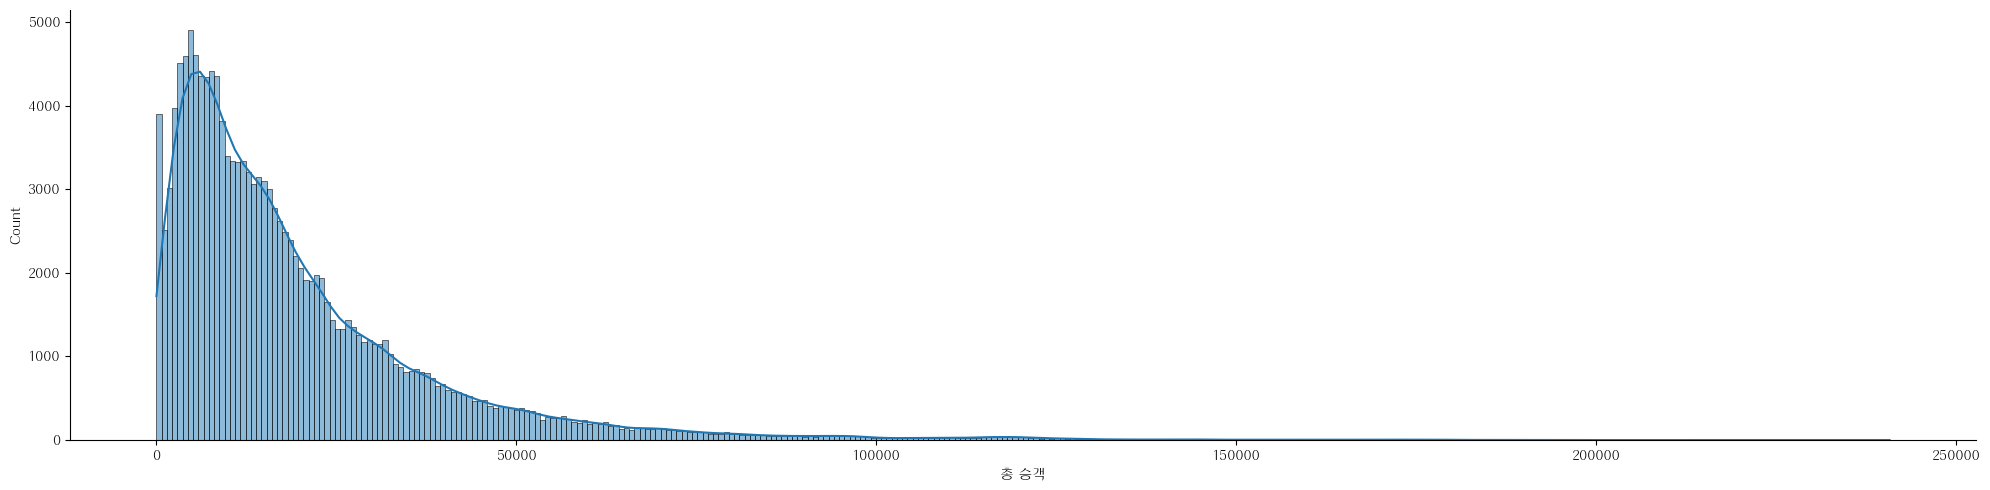

In [14]:
sns.displot(data=df9, x="총 승객", kde=True, aspect=4)

### 총승객 분포
 - 총 승객 수는 50,000명이하가 대다수를 차지하고 있음
 - 총 승객 수가 250,000명에 근접한 경우도 있음

C:\Users\KB\AppData\Local\Temp\ipykernel_5400\3958630559.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df9, x="총 승객", shade=True)


<AxesSubplot:xlabel='총 승객', ylabel='Density'>

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


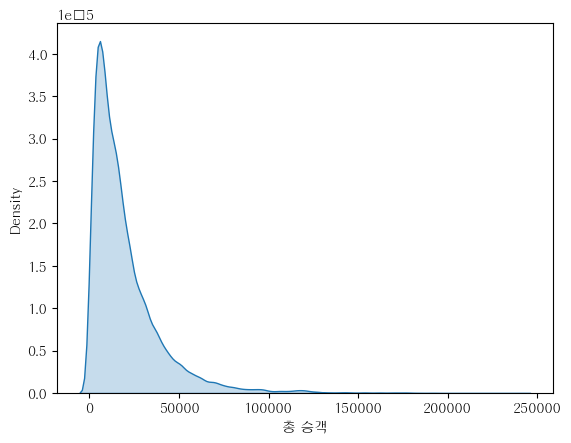

In [15]:
sns.kdeplot(data=df9, x="총 승객", shade=True)

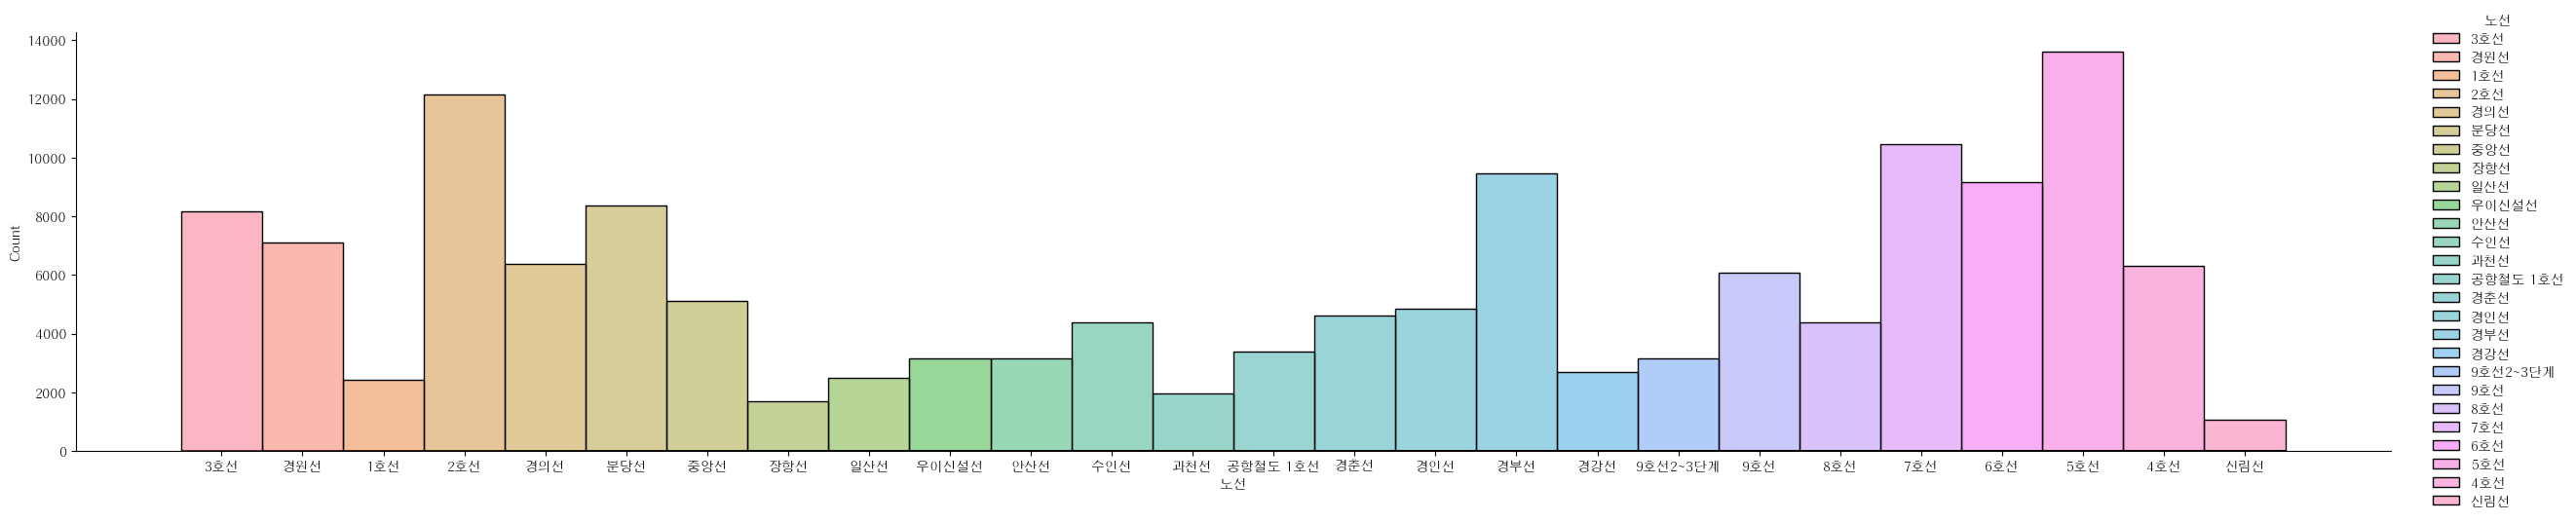

In [16]:
sns.displot(data=df9, x="노선", aspect=5, hue="노선")

### 노선별 총 승객 그래프

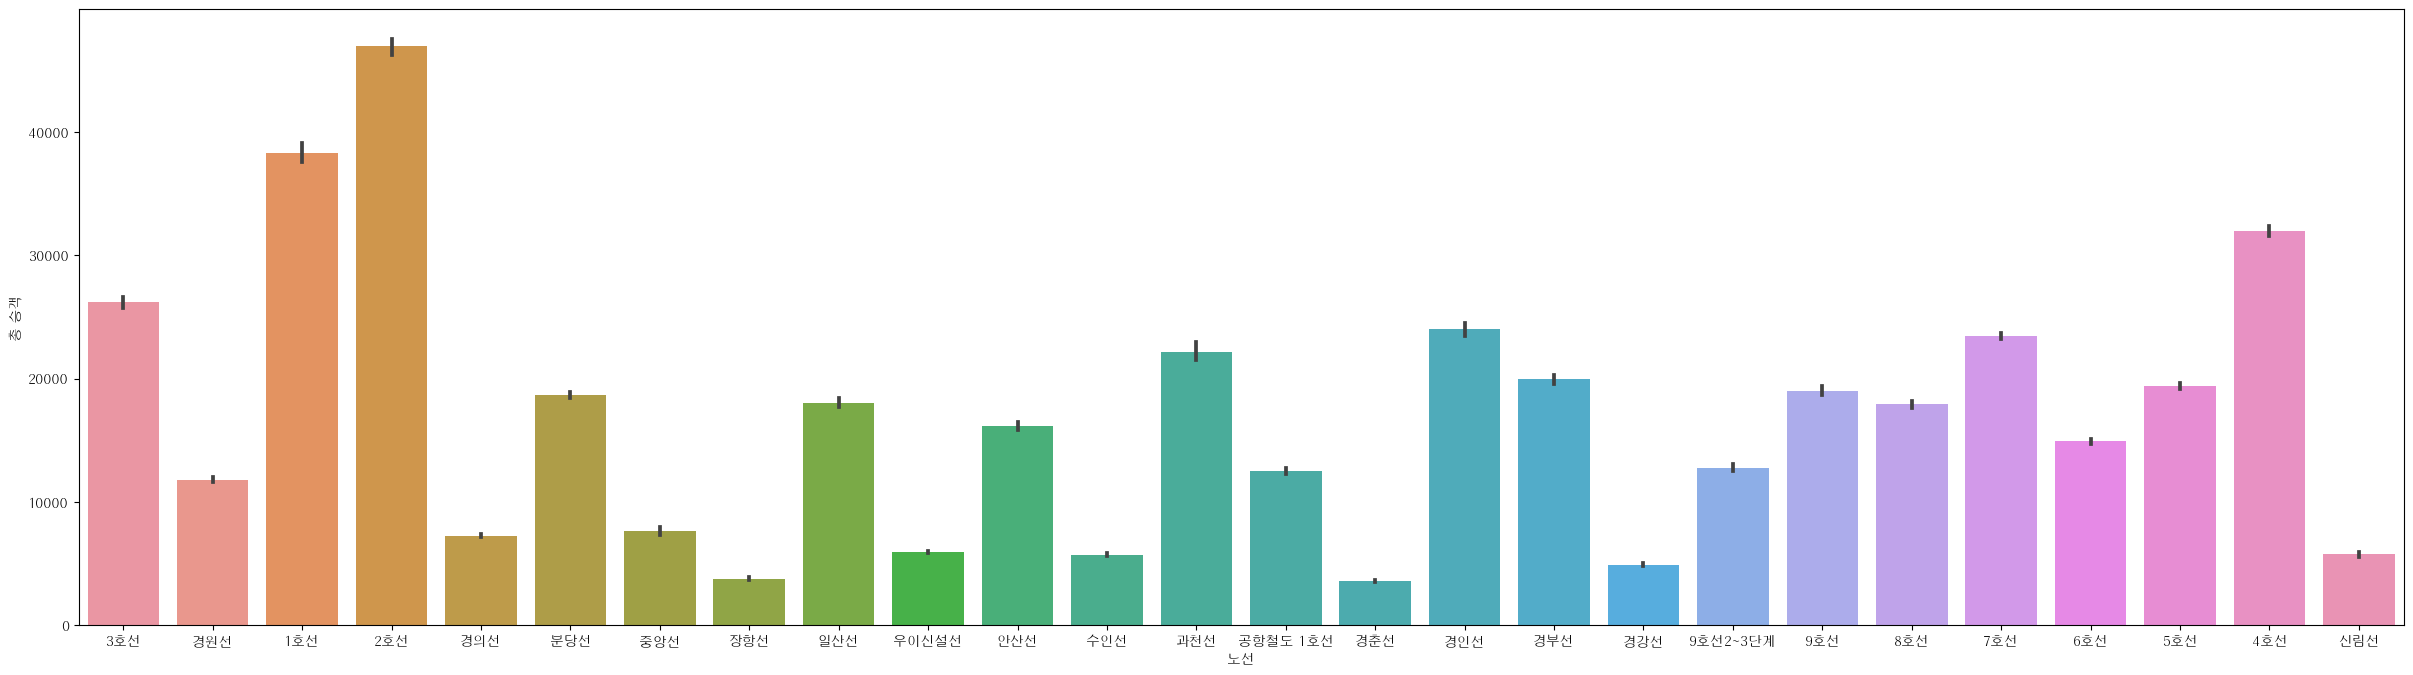

In [17]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="총 승객")
plt.show()

### 노선별 승차승객 그래프

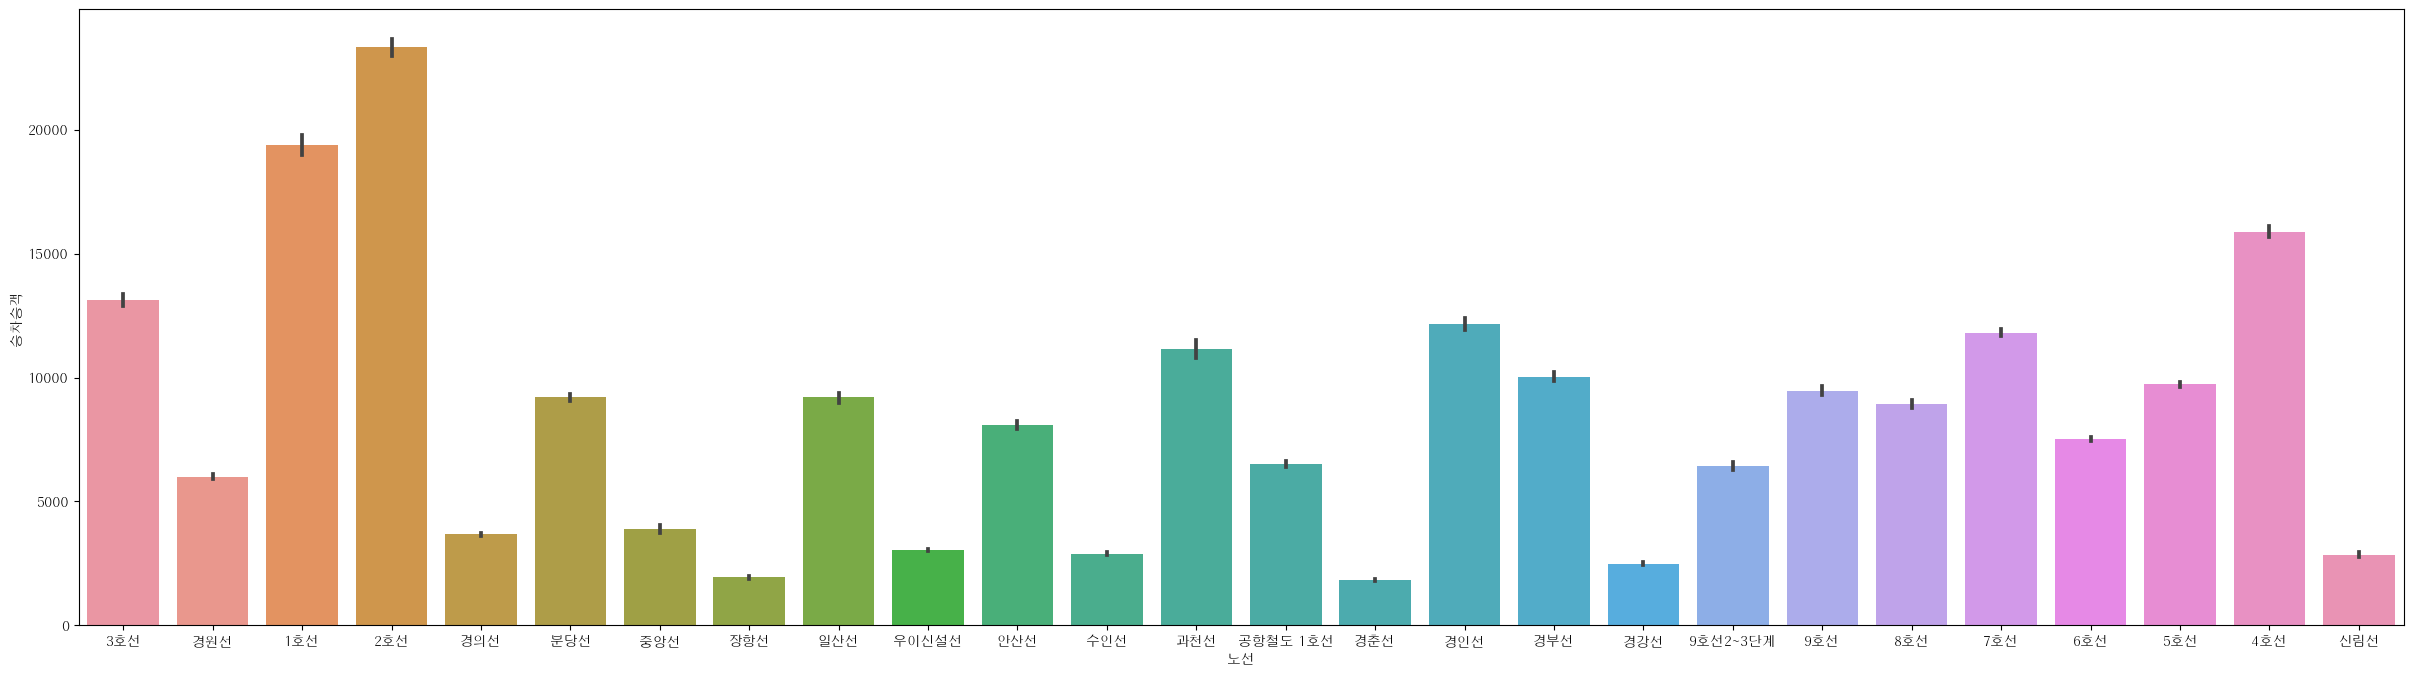

In [18]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="승차승객")
plt.show()

### 노선별 하차승객 그래프

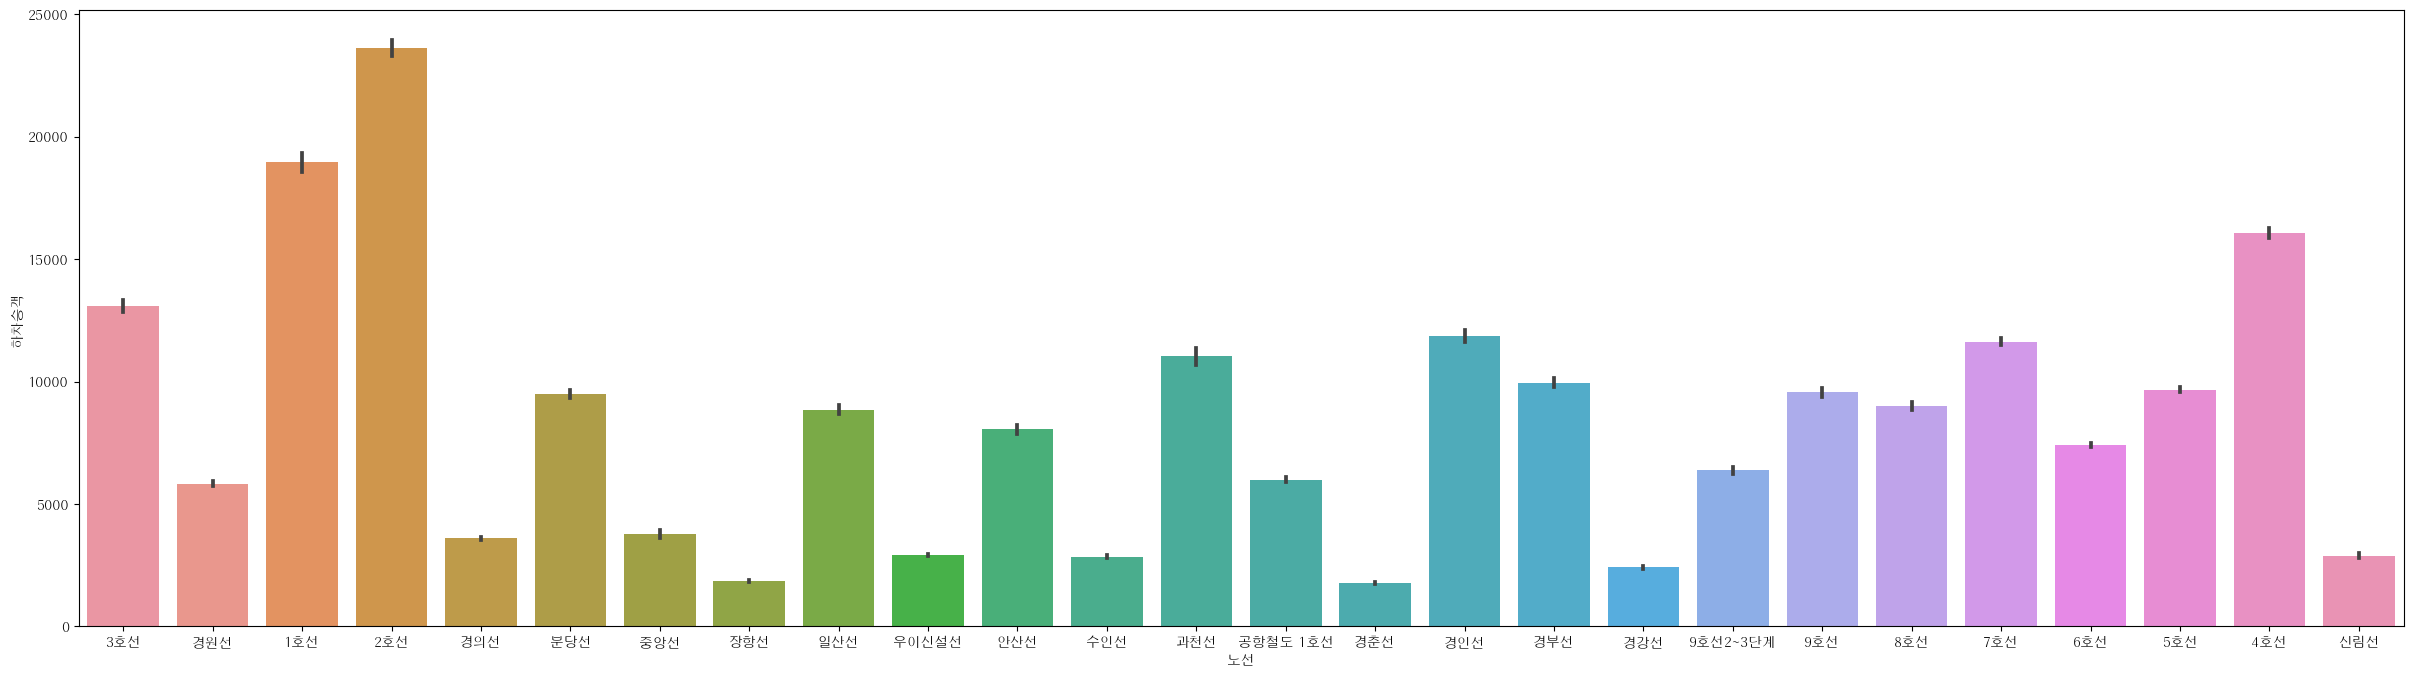

In [19]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="하차승객")
plt.show()

### 노선별 승차-하차 그래프

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


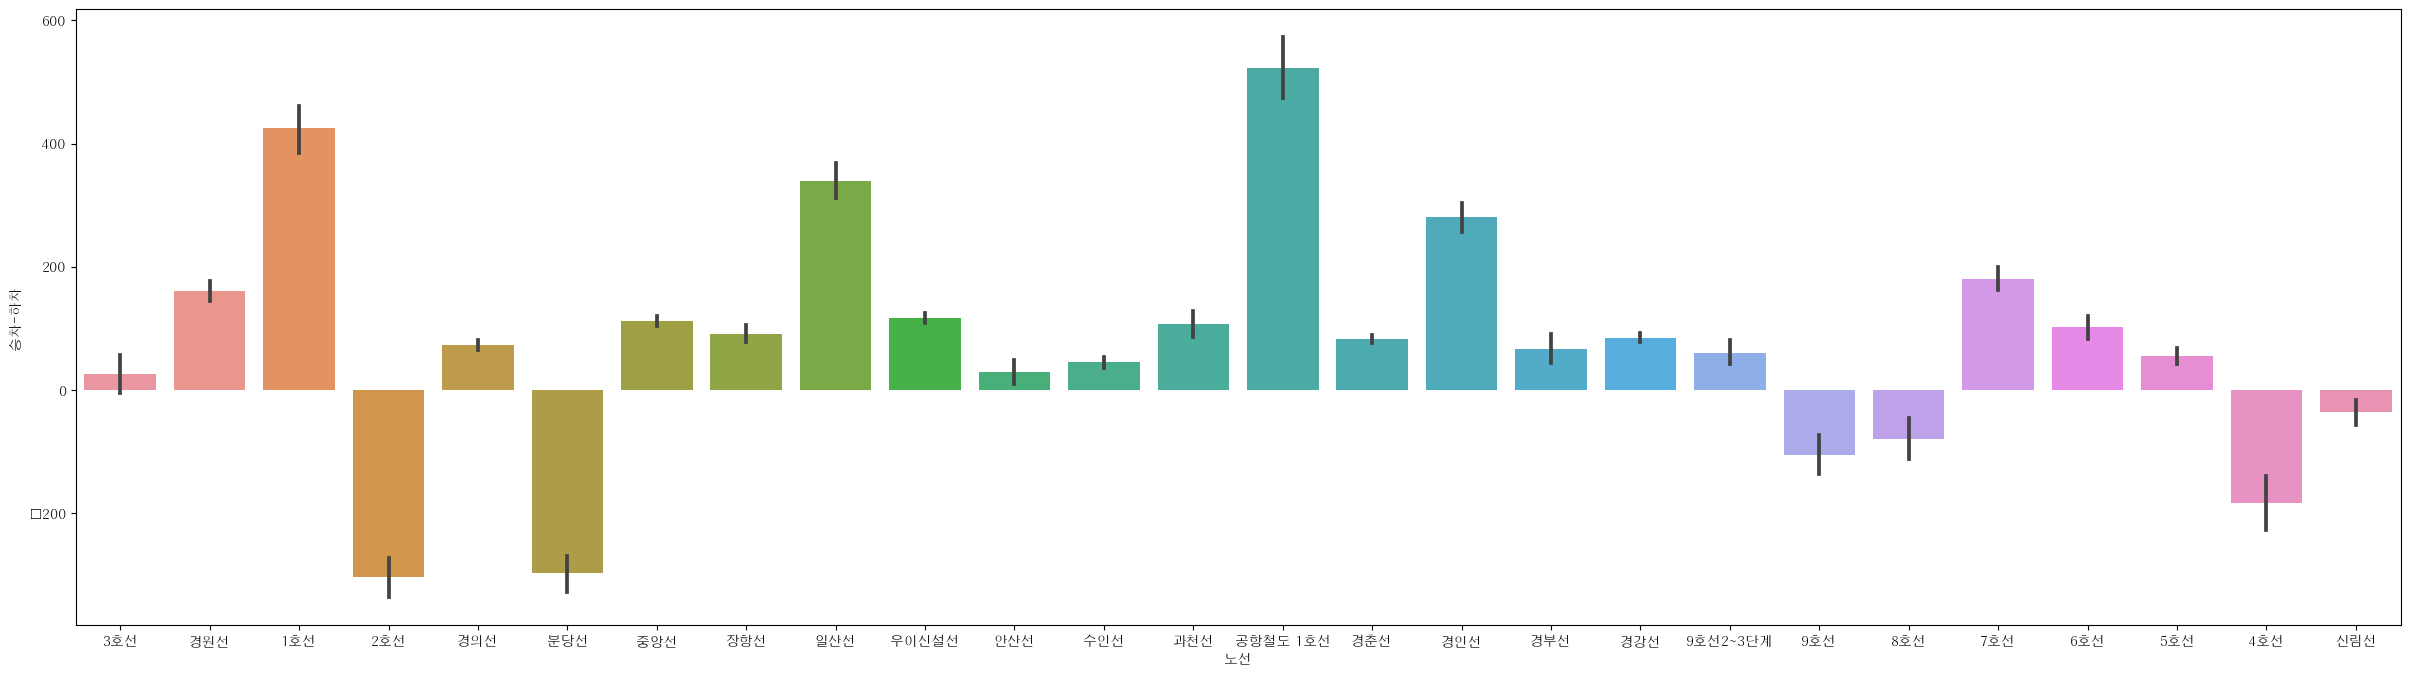

In [20]:
plt.subplots(figsize=(30, 8))
sns.barplot(data=df9, x="노선", y="승차-하차")
plt.show()

### 승차-하차
 - 2호선, 분당선, 9호선, 8호선, 4호선, 신림선은 승차한 승객보다 하차한 승객이 더 많다

### 컬럼 비교
 - 승차와 하차
 - 승차와 총 승객
 - 하차와 총 승객
 - 요일과 총 승객
 - 노선과 총 승객

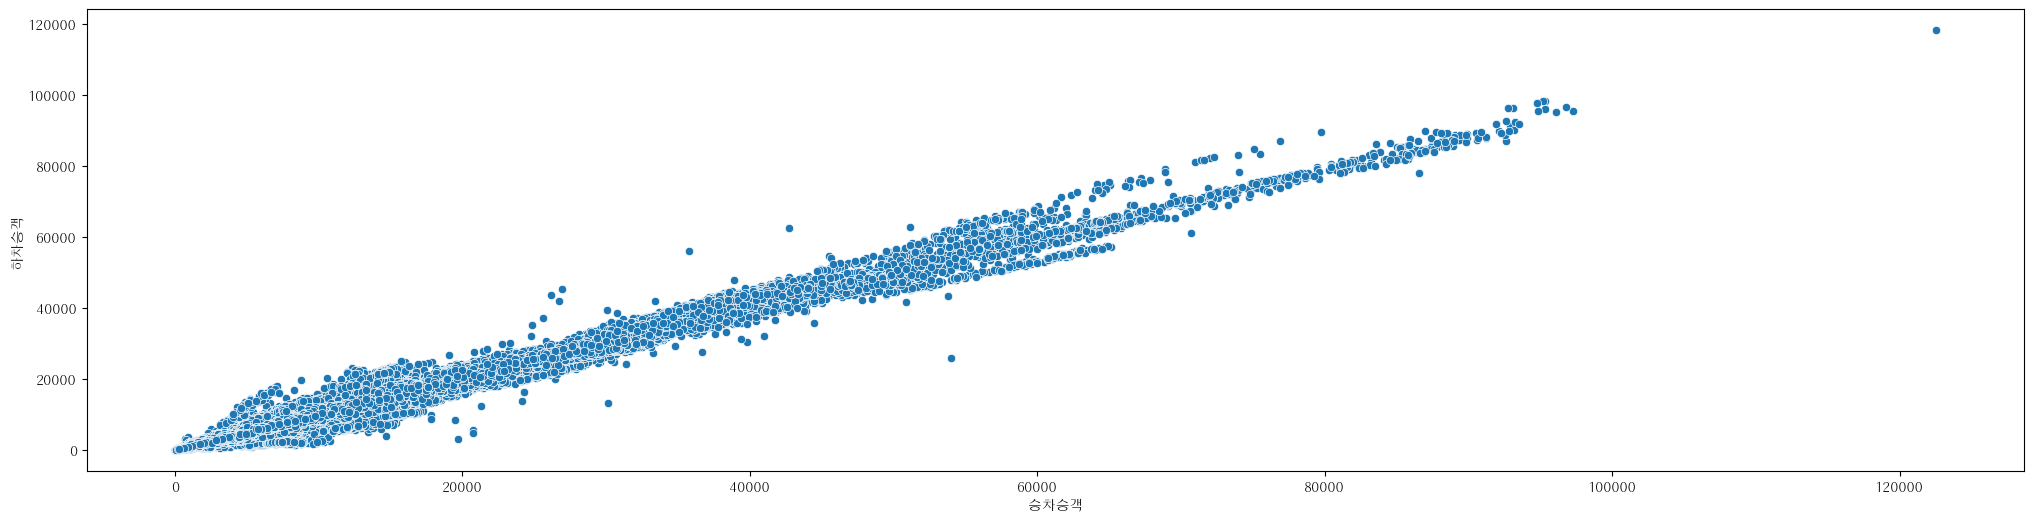

In [21]:
plt.subplots(figsize=(25, 6))
sns.scatterplot(data=df9, x="승차승객", y="하차승객")
plt.show()

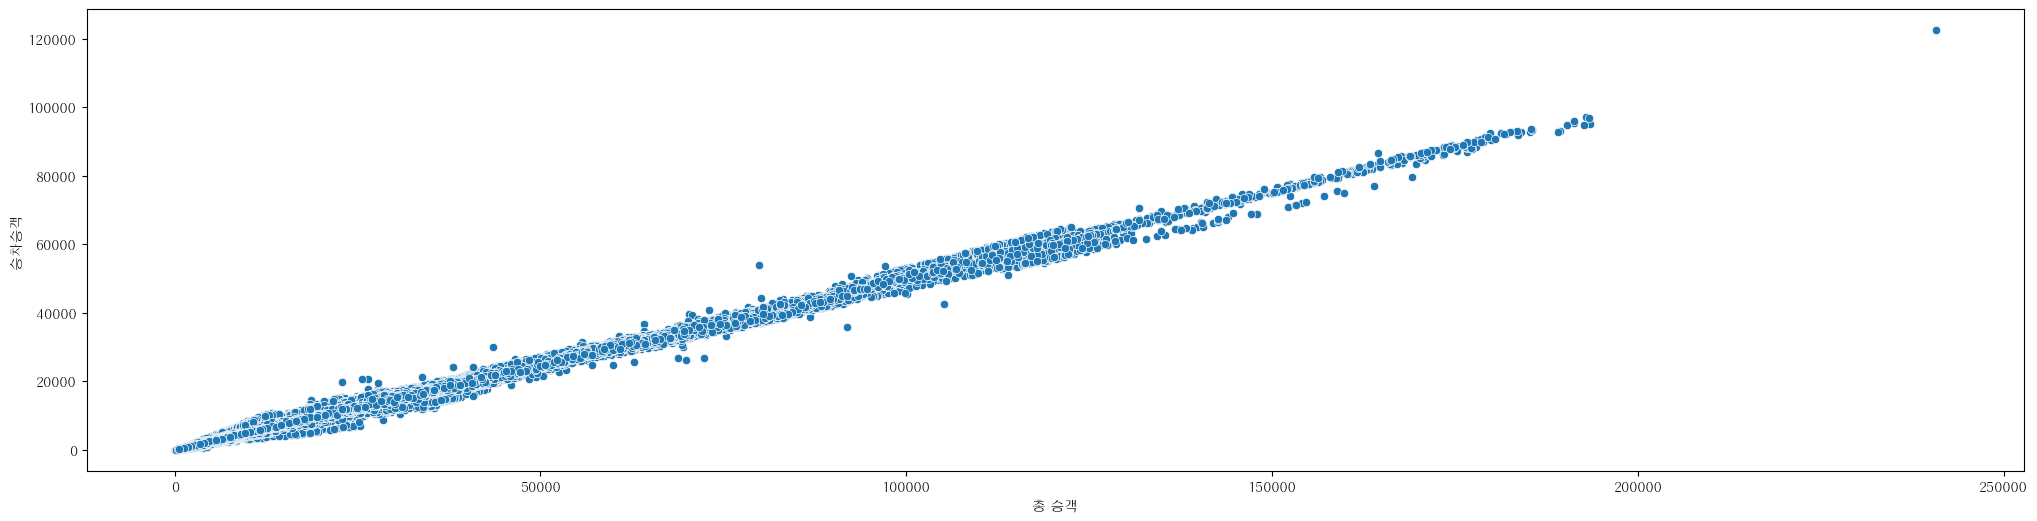

In [22]:
plt.subplots(figsize=(25, 6))
sns.scatterplot(data=df9, x="총 승객", y="승차승객")
plt.show()

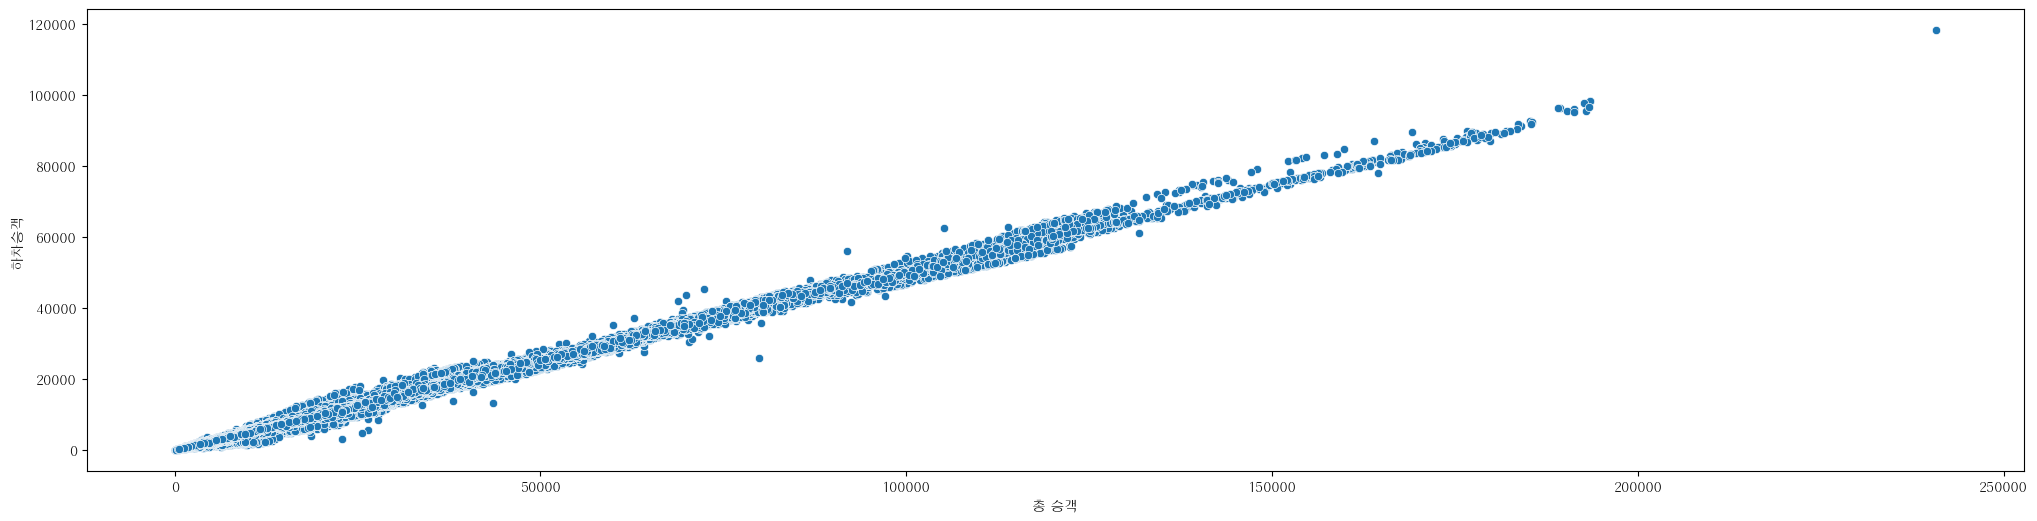

In [23]:
plt.subplots(figsize=(25, 6))
sns.scatterplot(data=df9, x="총 승객", y="하차승객")
plt.show()

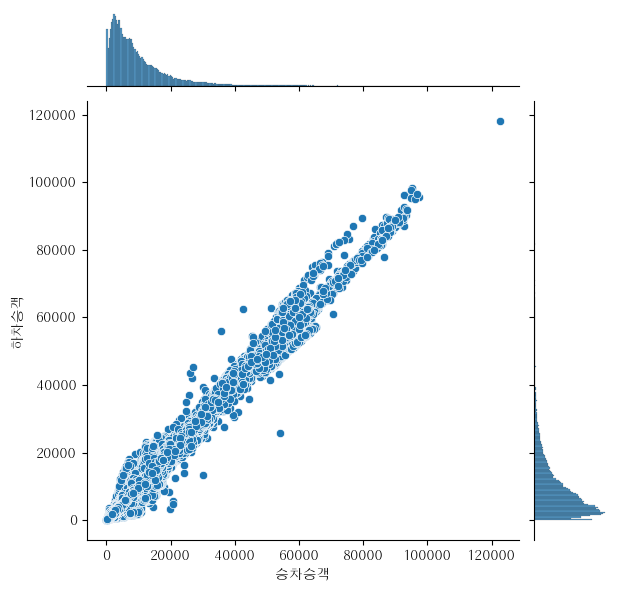

In [24]:
sns.jointplot(data=df9, x="승차승객", y="하차승객")

#### 상관관계
 - 승차와 하차, 총 승객과 승차, 총 승객과 하차는 양의 상관관계를 갖고 있다

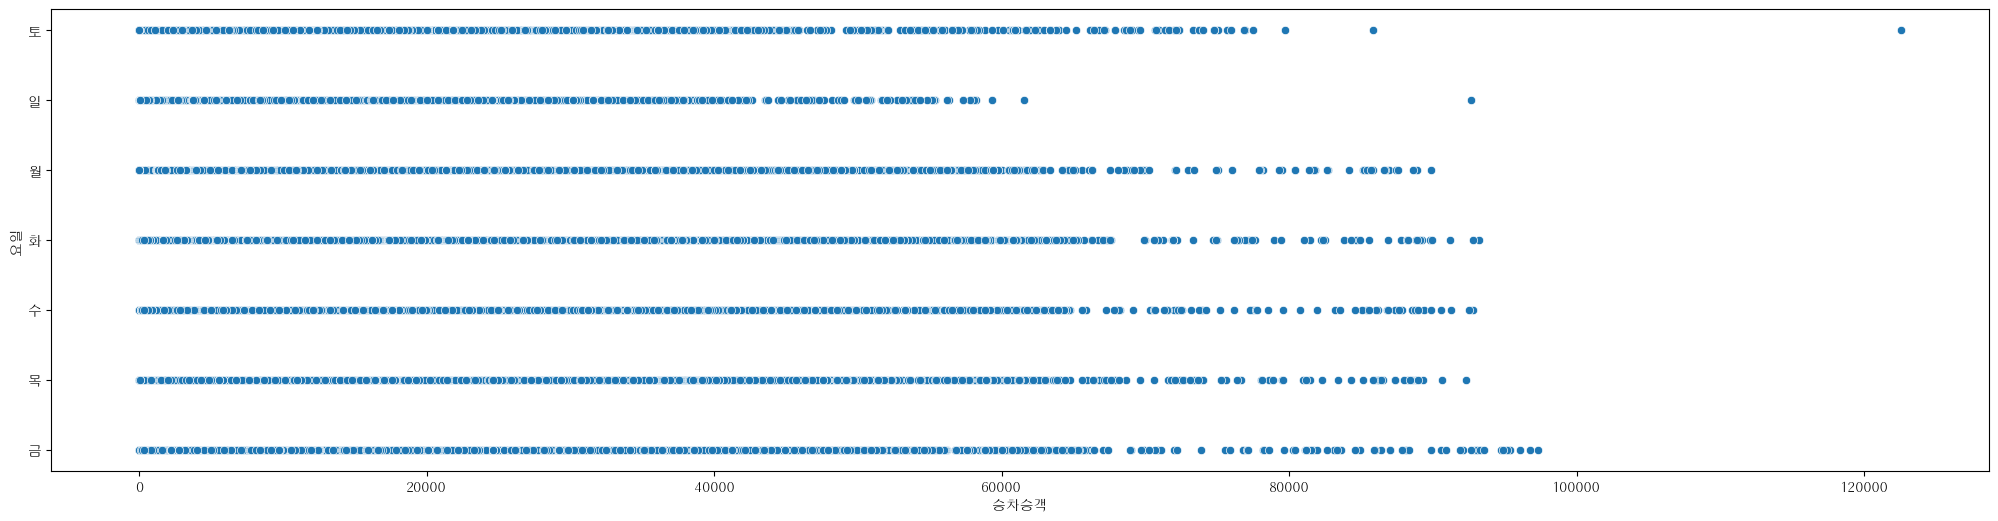

In [25]:
plt.subplots(figsize=(25, 6))
sns.scatterplot(data=df9, x="승차승객", y="요일")
plt.show()

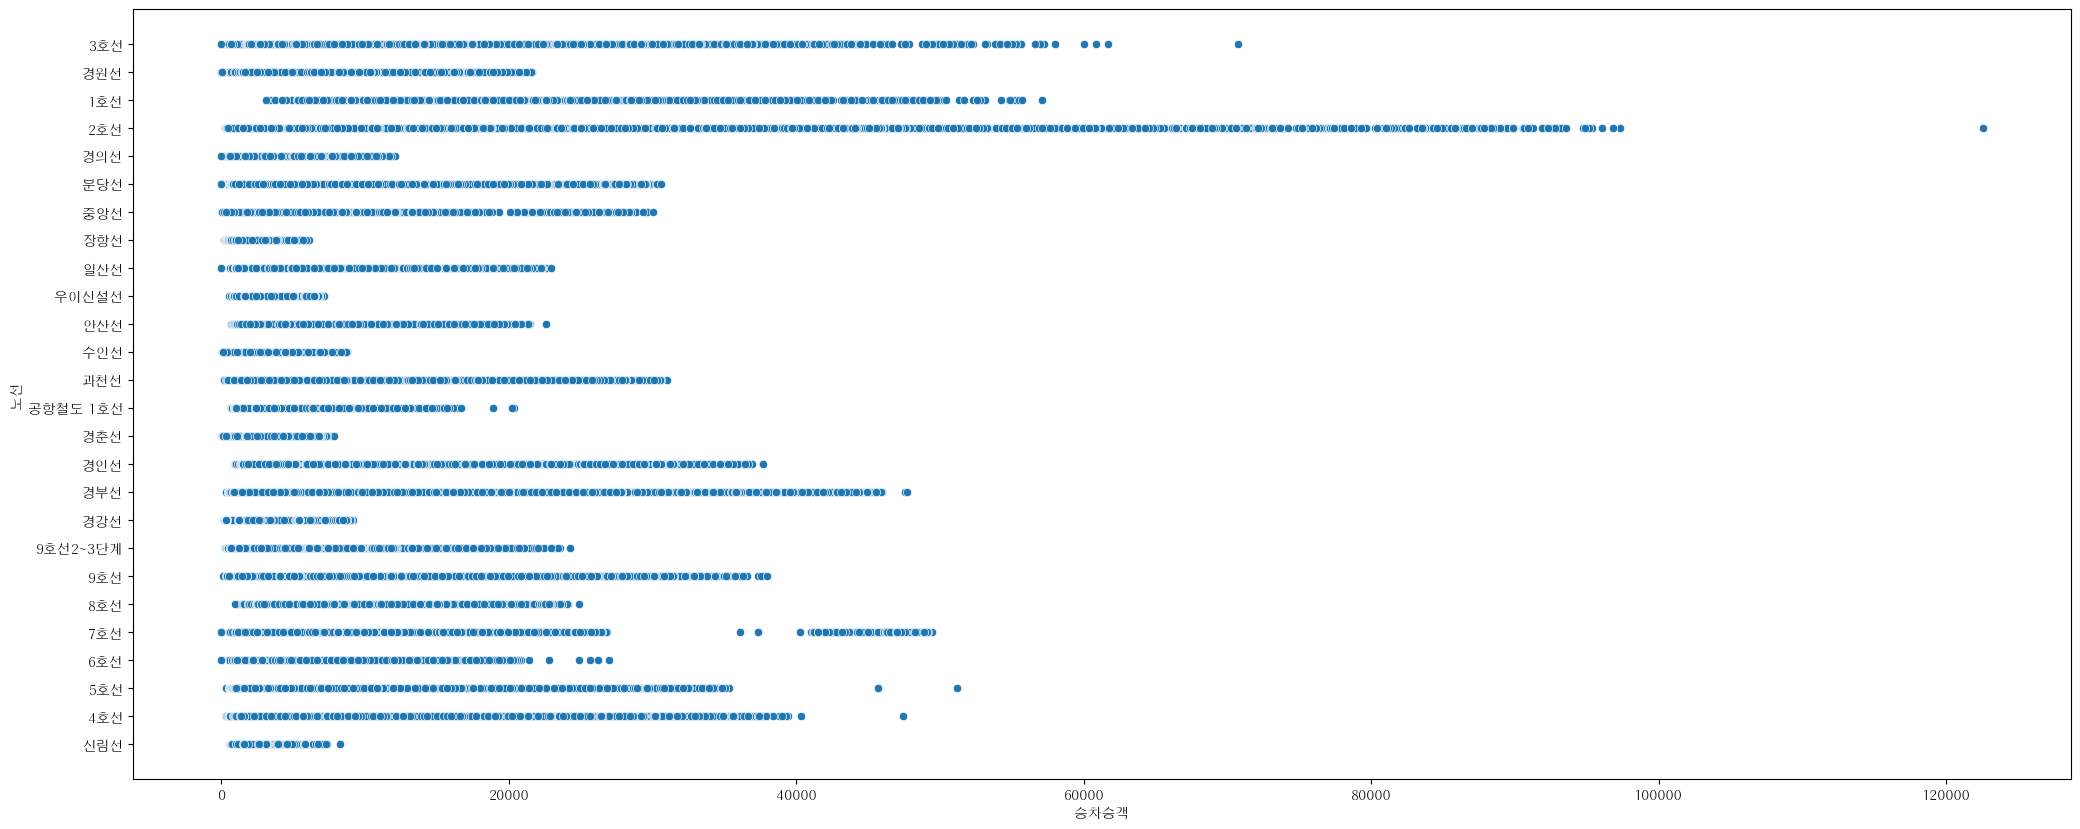

In [26]:
plt.subplots(figsize=(25, 10))
sns.scatterplot(data=df9, x="승차승객", y="노선")
plt.show()

### 각 노선별 승객 관련 그래프

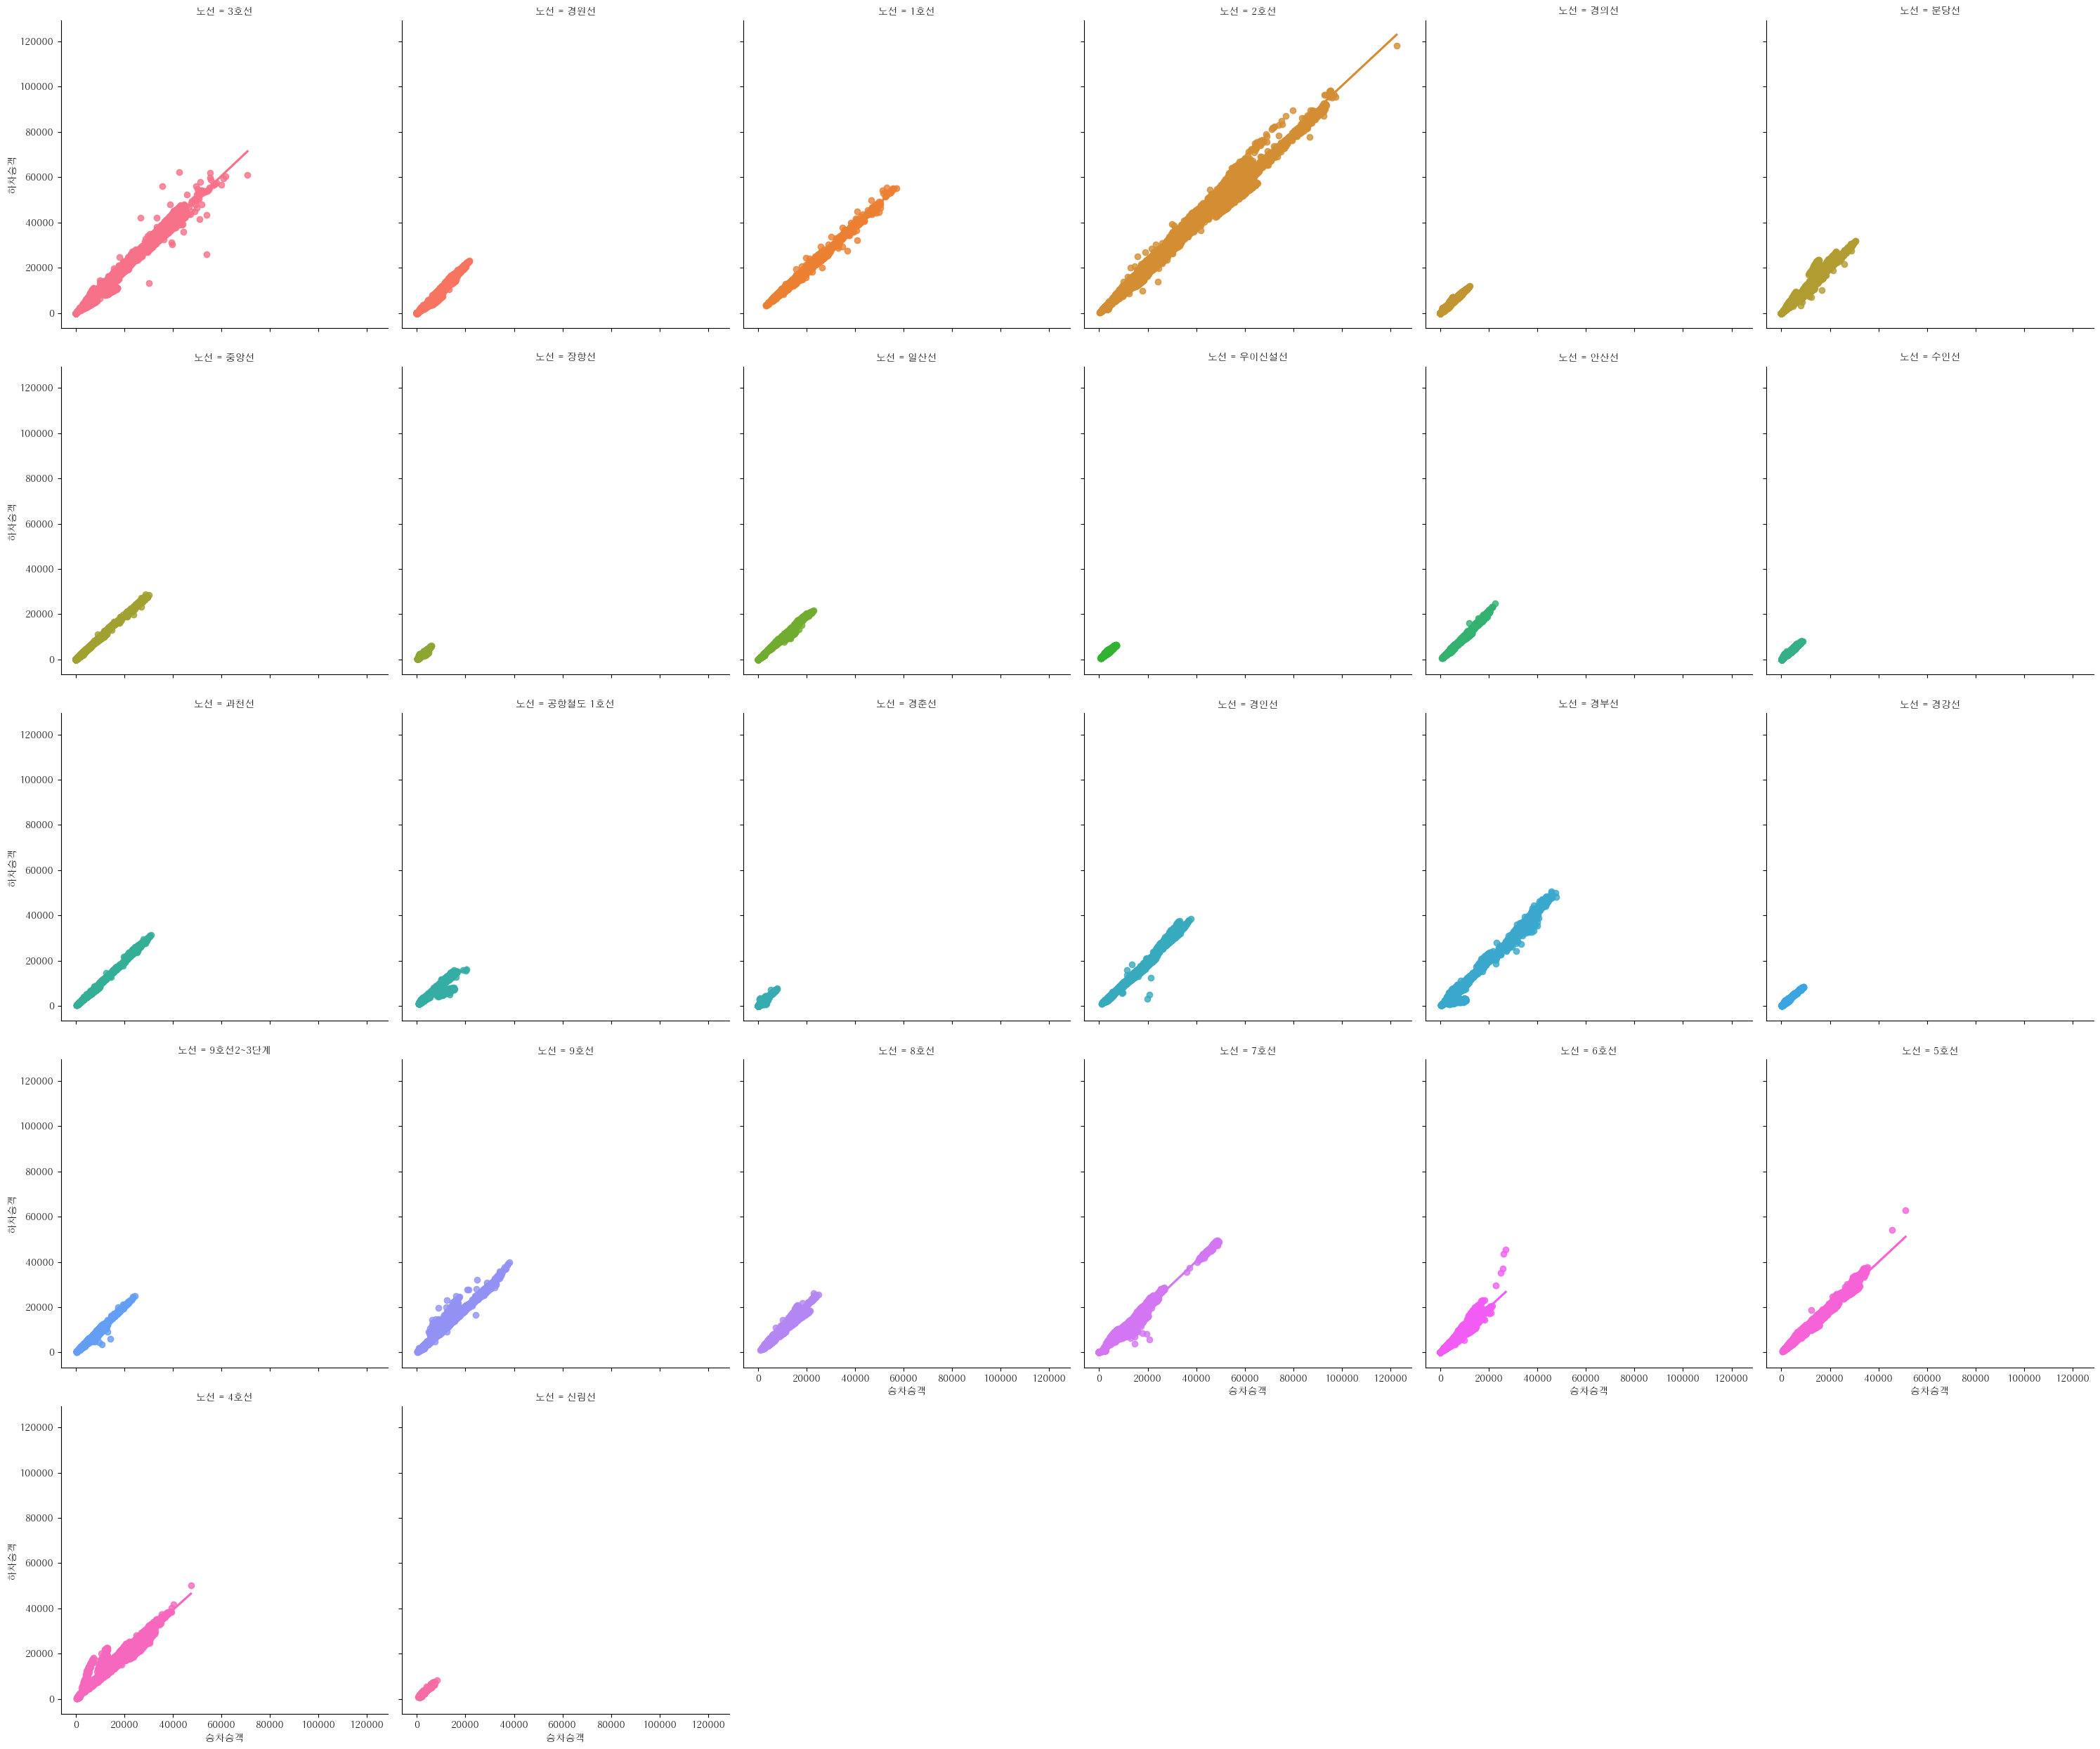

In [27]:
sns.lmplot(data=df9, x="승차승객", y="하차승객", hue="노선", col="노선", col_wrap=6)

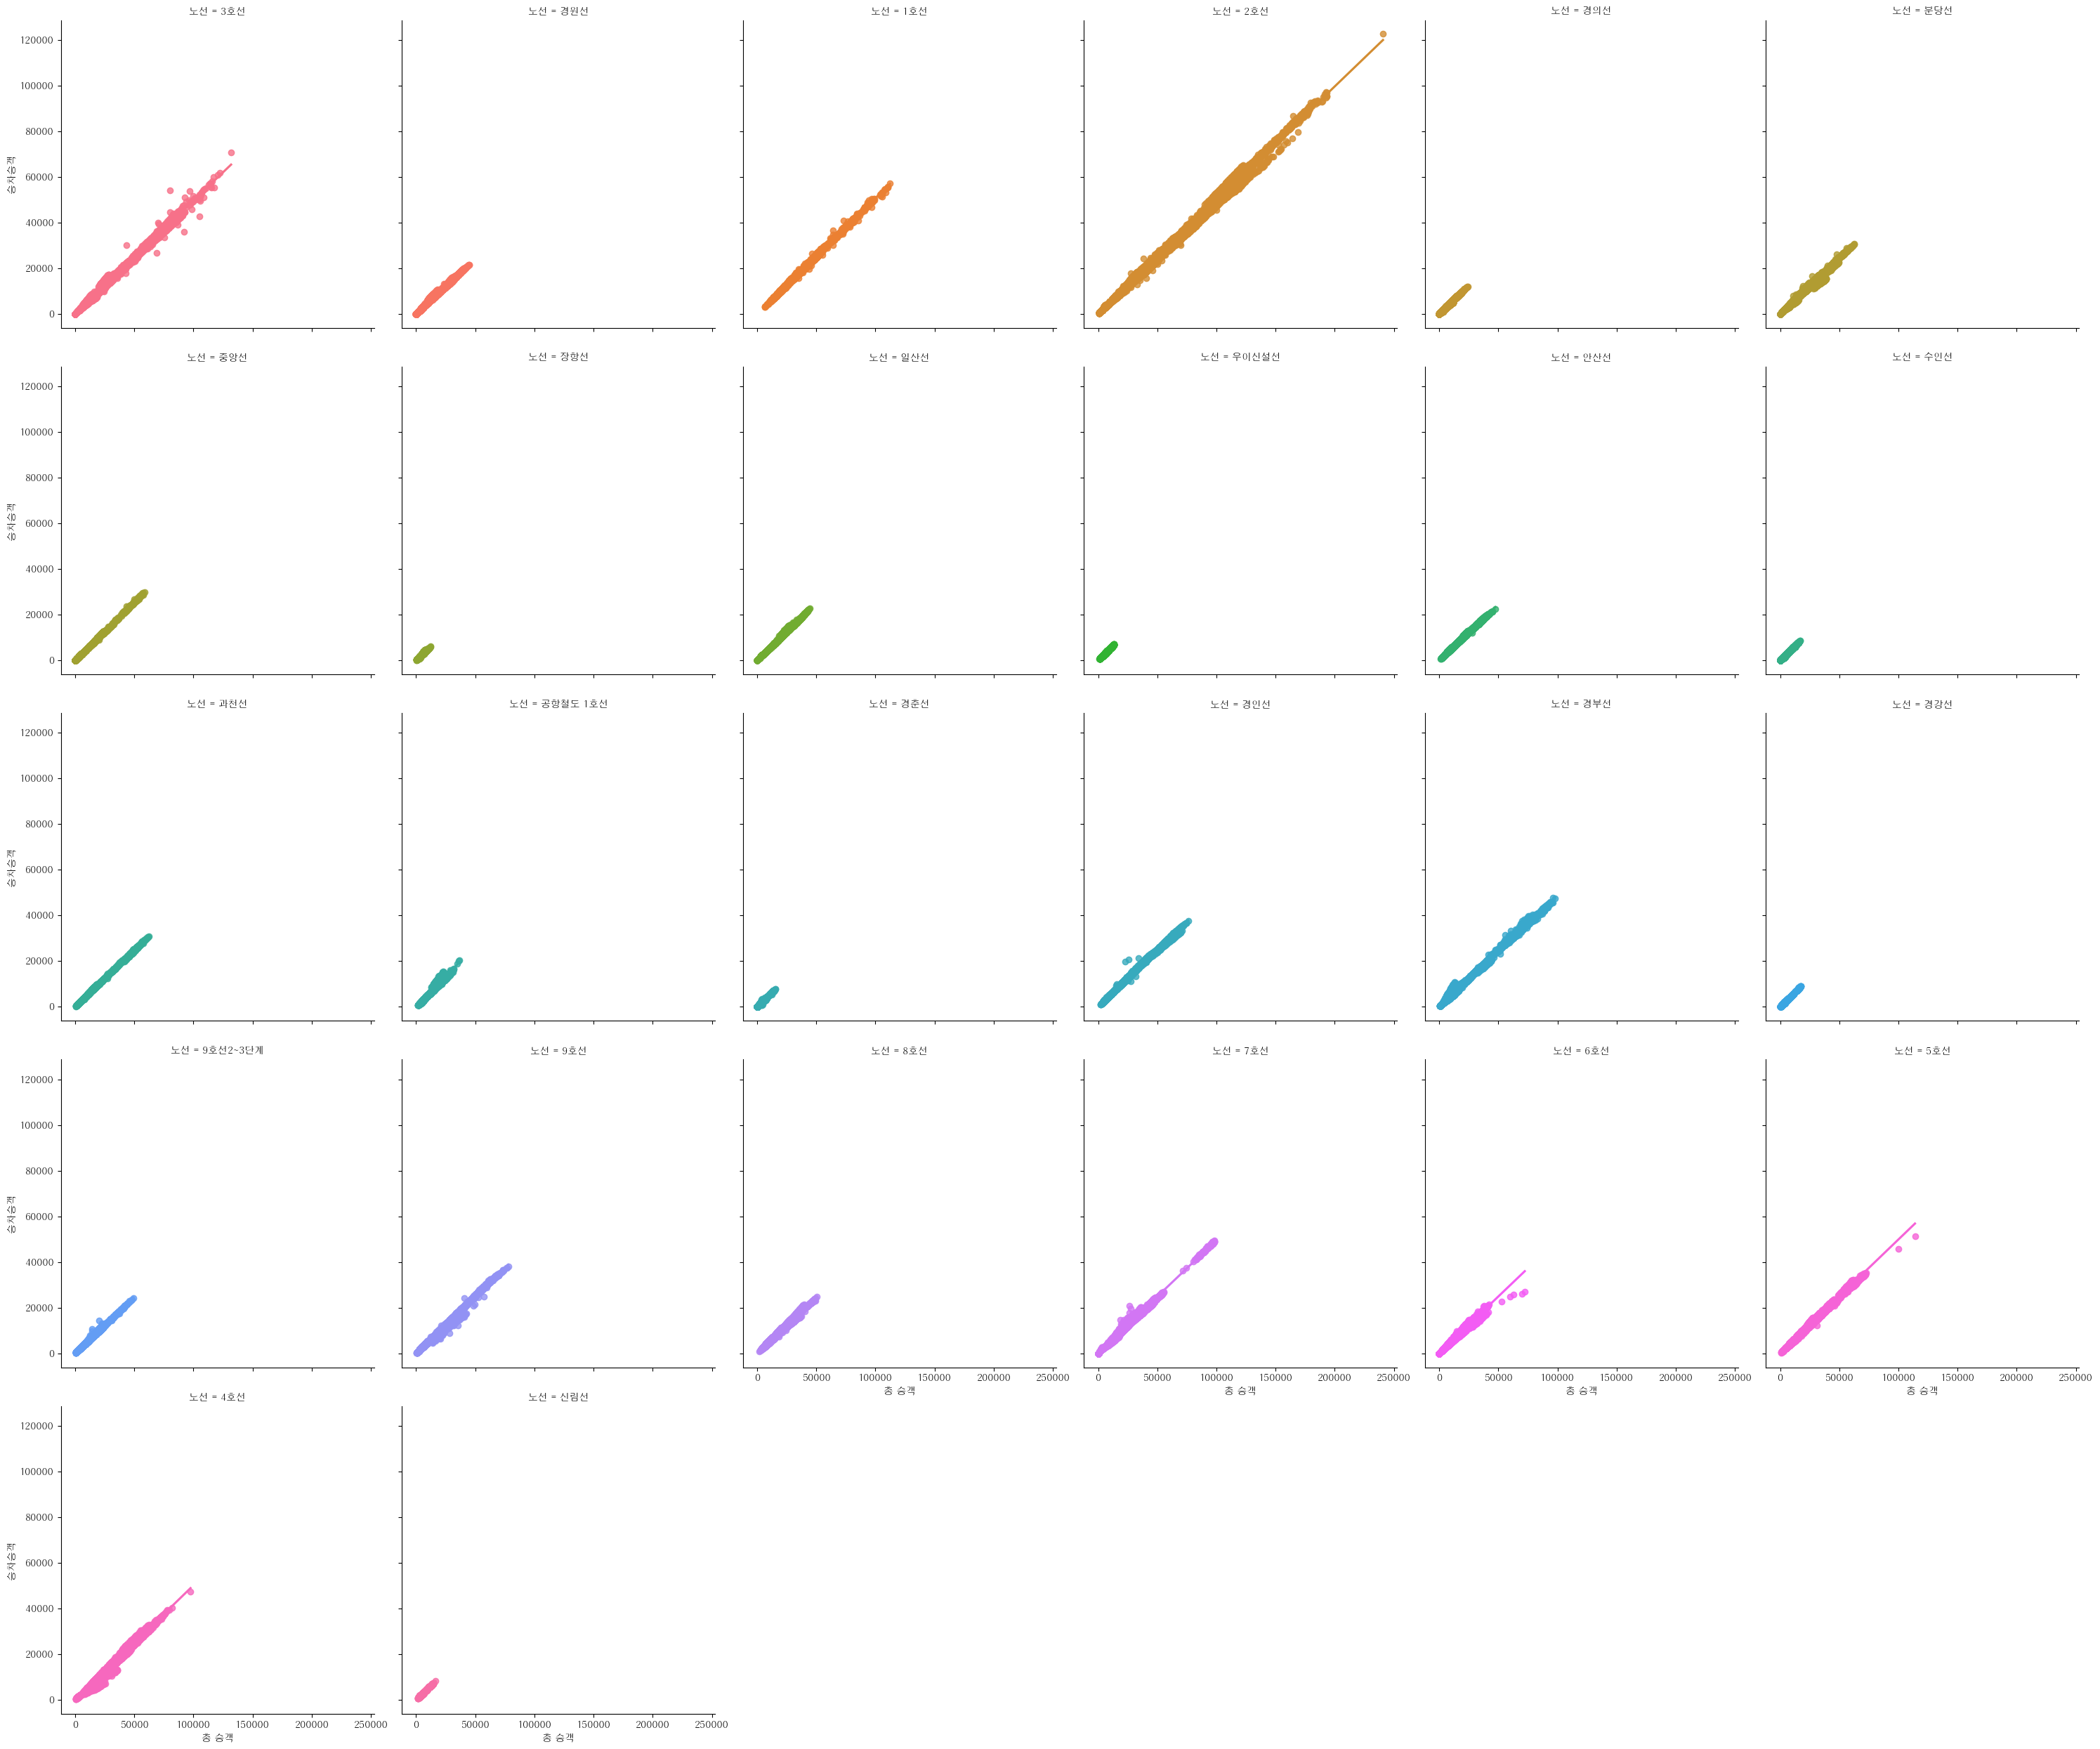

In [28]:
sns.lmplot(data=df9, x="총 승객", y="승차승객", hue="노선", col="노선", col_wrap=6)

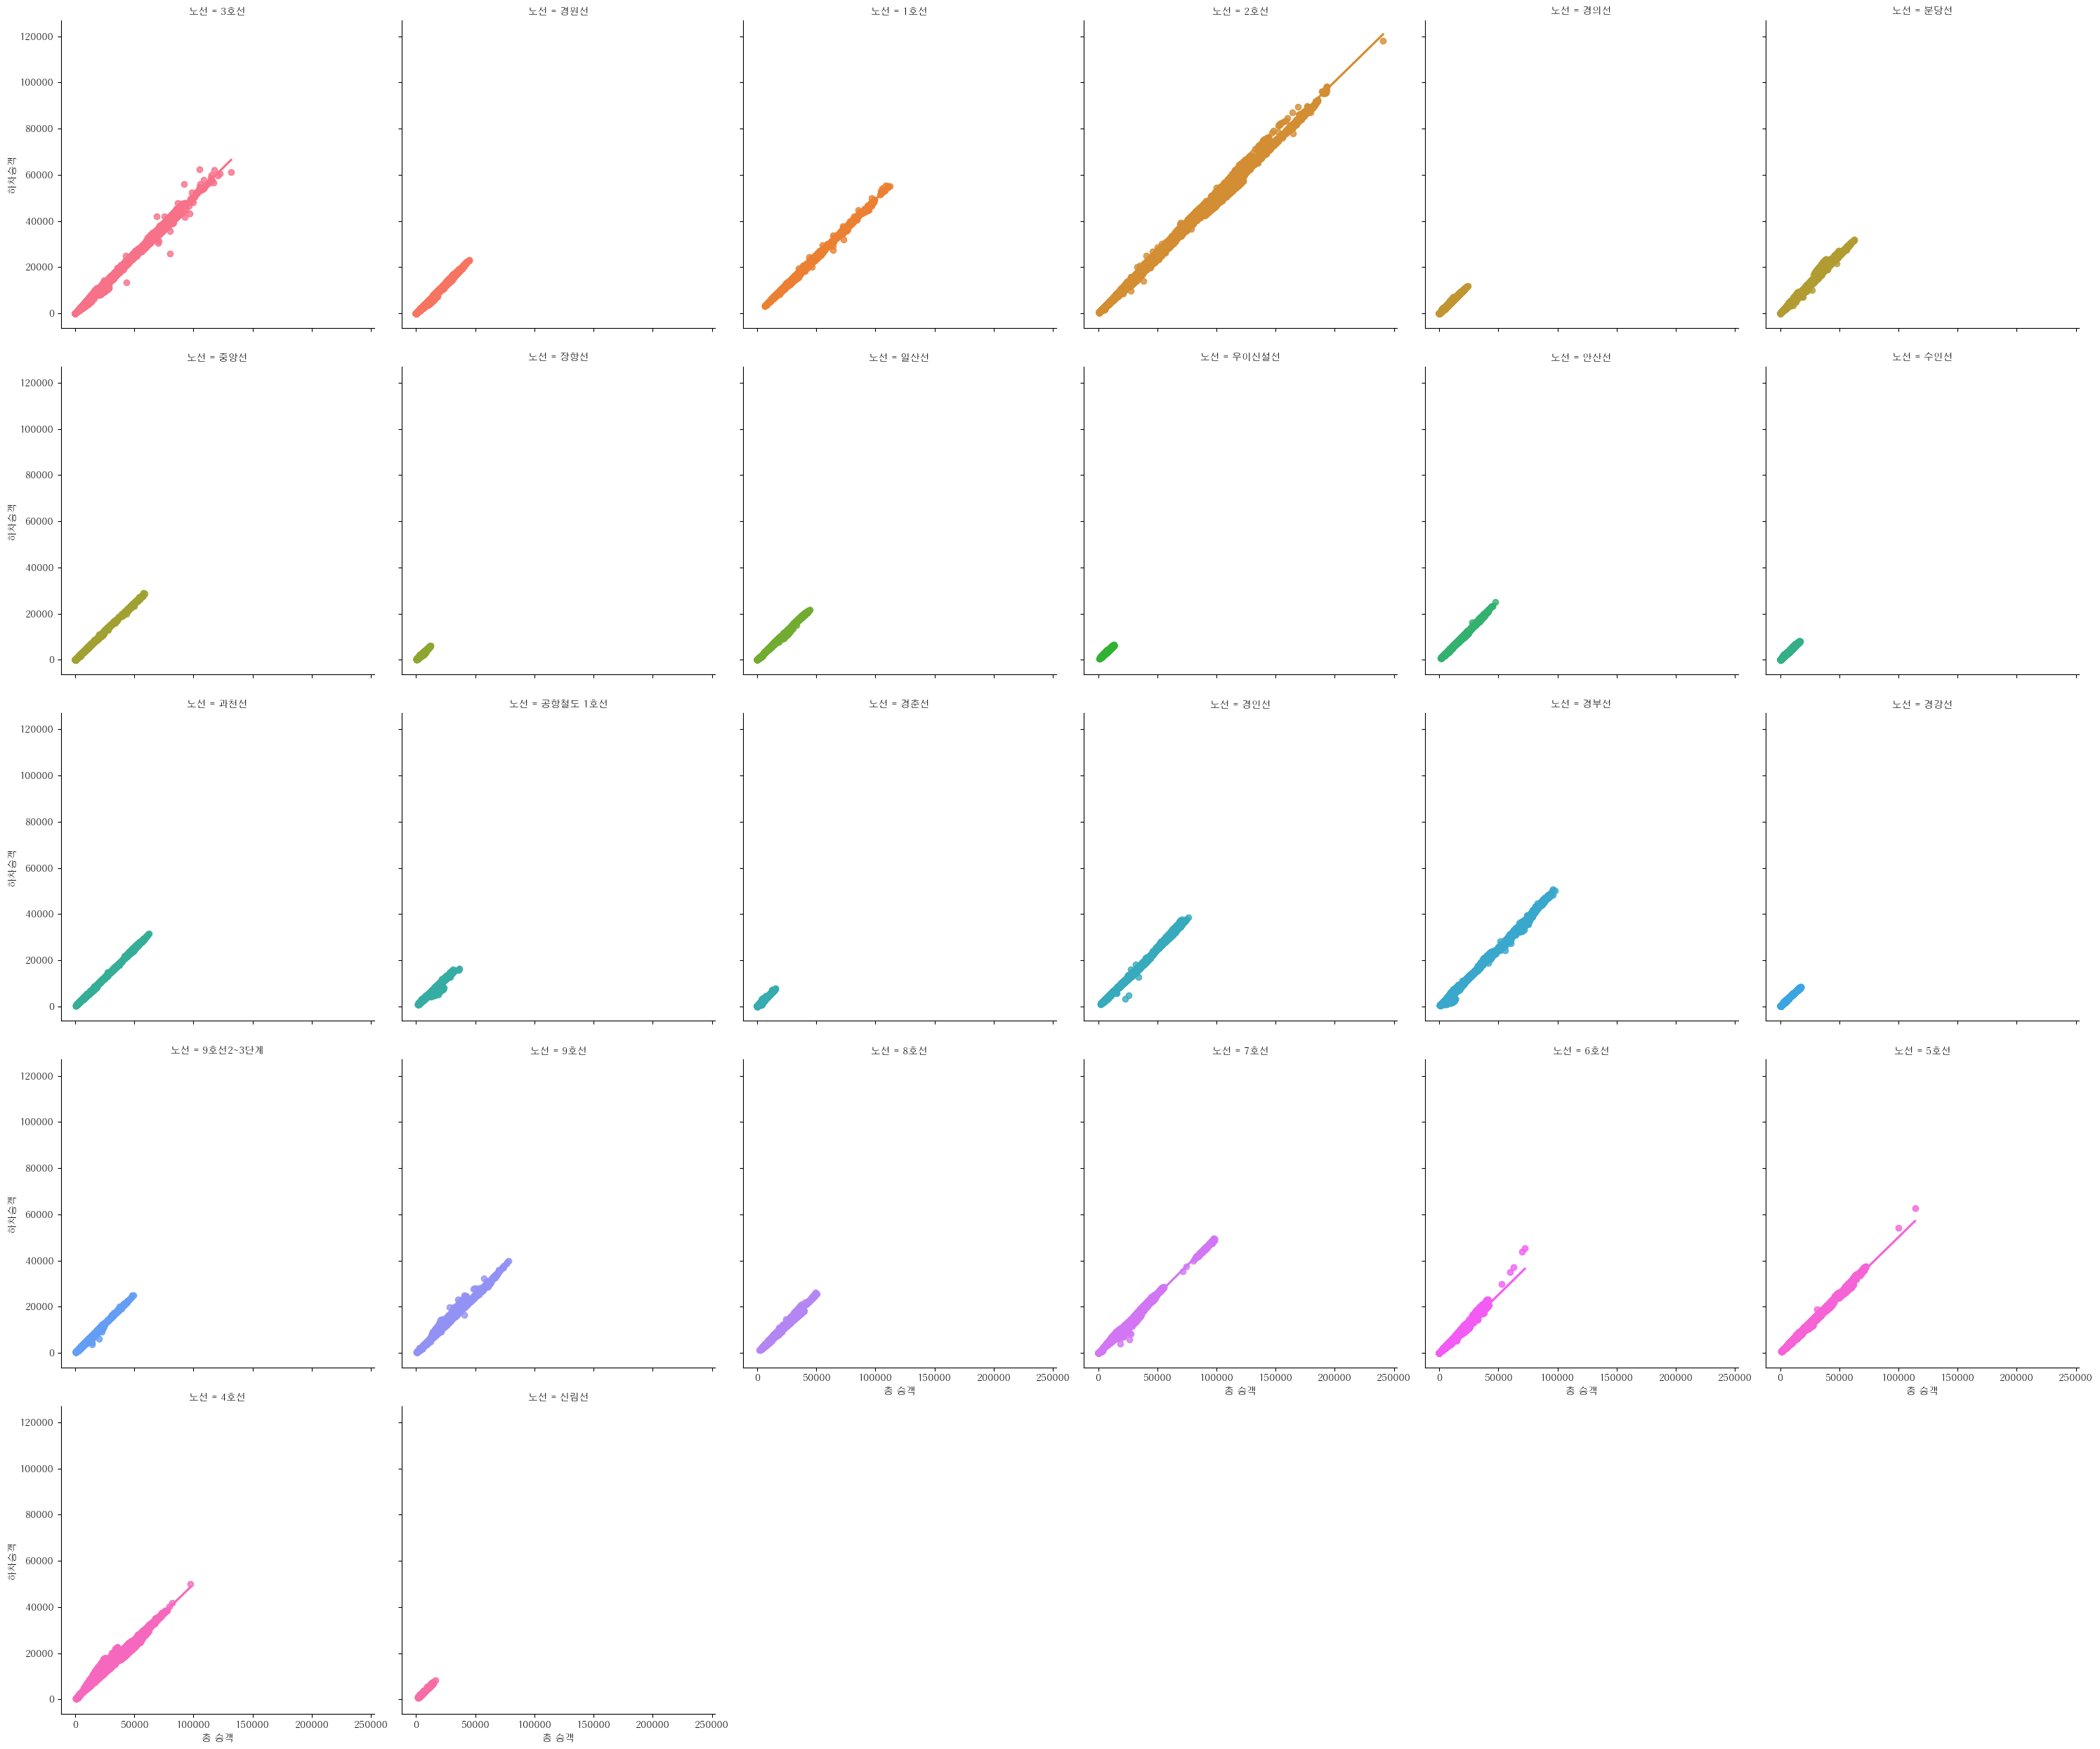

In [29]:
sns.lmplot(data=df9, x="총 승객", y="하차승객", hue="노선", col="노선", col_wrap=6)

### 노선별 총 승객 그래프

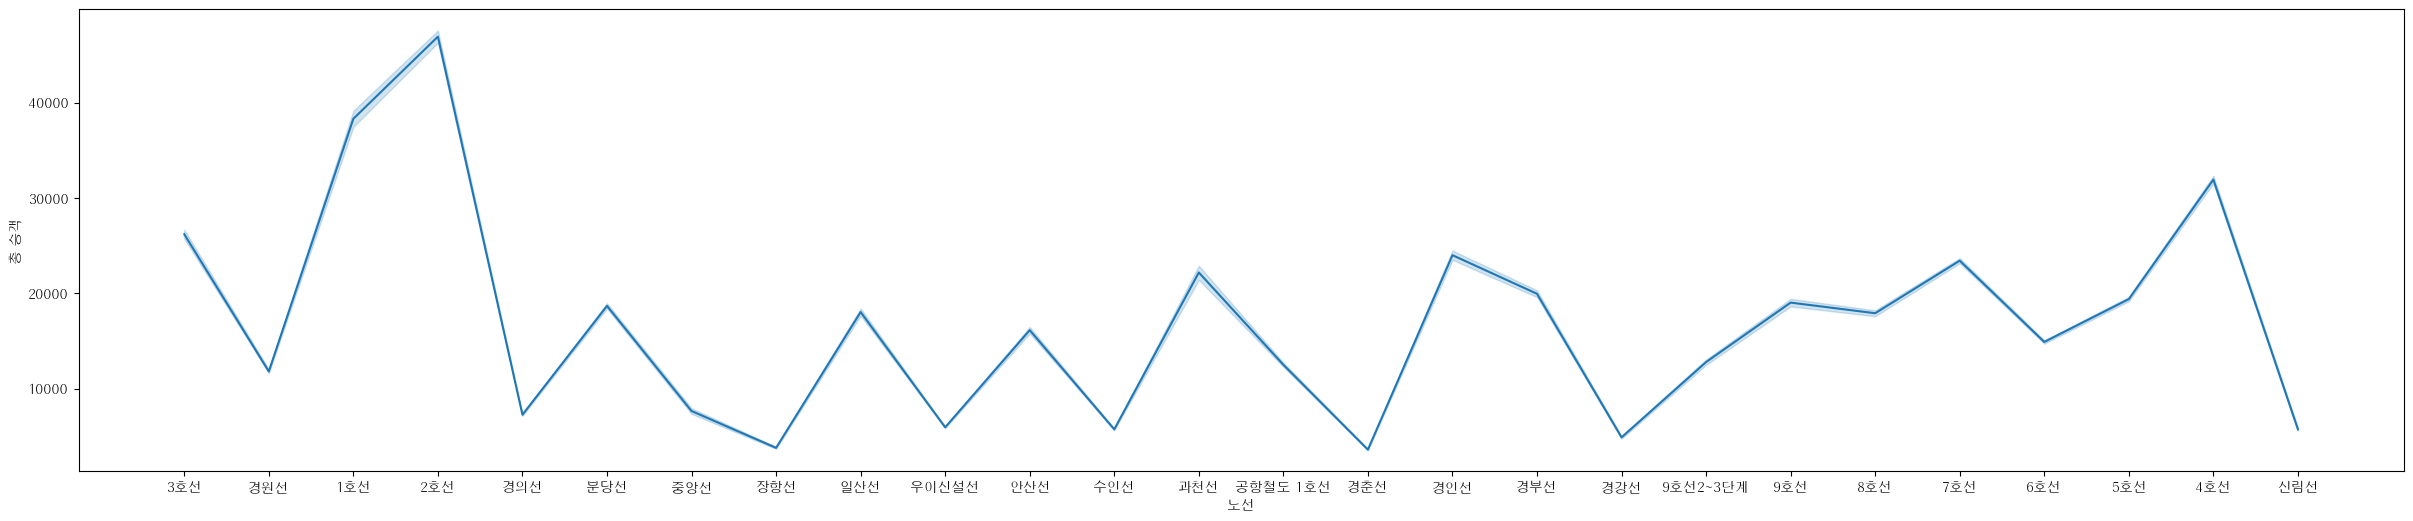

In [30]:
plt.subplots(figsize=(30, 6))
sns.lineplot(data=df9, x="노선", y="총 승객")
plt.show()

In [31]:
line_name = np.sort(df9.노선.unique())
line_code = pd.DataFrame(list(enumerate(line_name)), columns=['노선코드','노선명'])
line_code

,노선코드,노선명
0,0,1호선
1,1,2호선
2,2,3호선
3,3,4호선
4,4,5호선
5,5,6호선
6,6,7호선
7,7,8호선
8,8,9호선
9,9,9호선2~3단계


In [32]:
s = df9[['노선', '역']].drop_duplicates().노선.value_counts()
line_code['역수'] = line_code.노선명.map(s)
line_code

,노선코드,노선명,역수
0,0,1호선,10
1,1,2호선,50
2,2,3호선,34
3,3,4호선,26
4,4,5호선,56
5,5,6호선,39
6,6,7호선,51
7,7,8호선,18
8,8,9호선,25
9,9,9호선2~3단계,13


In [33]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [40]:
wc=line_code.set_index("노선명").to_dict()["역수"]

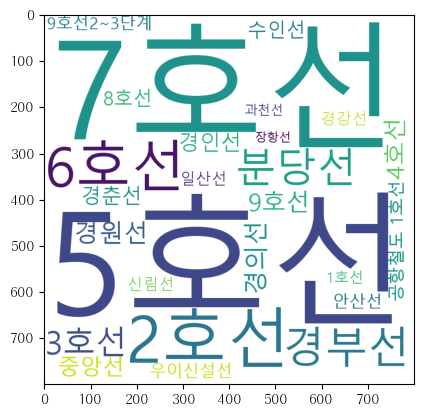

In [42]:
wordcloud = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, background_color="white")
gen =wordcloud.generate_from_frequencies(wc)
plt.figure()
plt.imshow(gen)